In [5]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10, array

font = {'family' : 'Arial',
        'size'   : 18}

plt.rc('font', **font)

def model(z,t, params):
    kf, kr, A = params
    # kf: forward rate
    # kr: reverse rate 
    # A: Arp density 
    F, G = z
    dFdt = kf*F*G**2 *A - kr*F
    dGdt = -dFdt
    return [dFdt, dGdt]

def getActinLevel(IC = [1,10], params=(1,1,1)):
    kf, kr, A = params
    # long enough to reach steady state 
    t = np.linspace(0, 500, 1000)
    zList = [odeint(model, IC, t, args=((kf,kr,a),)) for a in A]
    FA = [z[-1,0] for z in zList]
    return FA

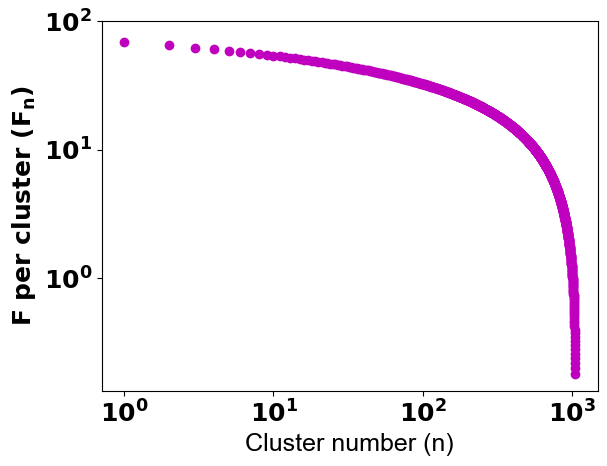

Text(0, 0.5, 'Global F (n * F$_n$)')

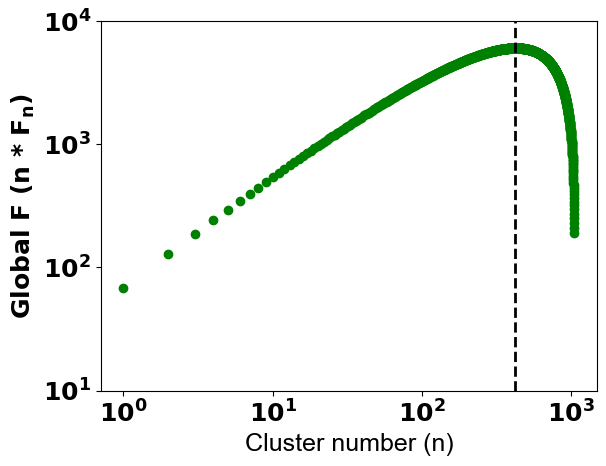

In [23]:
nCluster = np.arange(1,1051,1)

Alpha = 1 # Surface density of Arp2/3 at the single large cluster

arp = Alpha * nCluster **-0.33

FA = getActinLevel(IC=[0.01,100], params=(0.001,1,arp))

plt.plot(log10(nCluster), log10(FA), 'mo')

plt.xticks([0,1,2,3], labels=['10$^{0}$','10$^{1}$', '10$^{2}$', '10$^{3}$'])
plt.yticks([0,1,2], labels=['10$^{0}$', '10$^{1}$', '10$^{2}$'])

plt.xlabel('Cluster number (n)')
plt.ylabel('F per cluster (F$_n$)')
plt.show()

plt.plot(log10(nCluster), log10(FA*nCluster), 'go')
plt.axvline(log10(420), ls='dashed', lw=2, c='k')
plt.xticks([0,1,2,3], labels=['10$^{0}$','10$^{1}$', '10$^{2}$', '10$^{3}$'])
plt.yticks([1,2,3,4], labels=['10$^{1}$', '10$^{2}$', '10$^{3}$', '10$^{4}$'])
plt.xlabel('Cluster number (n)')
plt.ylabel('Global F (n * F$_n$)')